<a href="https://colab.research.google.com/github/immabridget/Timeseries-models/blob/main/TBATS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and data


In [ ]:
!pip install tbats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data.csv to Data (1).csv


In [ ]:
#import libraries
import pandas as pd
import numpy as np

In [ ]:
#get the data
data = pd.read_csv("Data.csv", 
                   index_col = "Date", 
                   parse_dates = True)
data.head(1)

,Amount
Date,
2020-01-02,0.002


#Data Transformation

In [ ]:
#index
data = data.asfreq("D")
data.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-11',
               ...
               '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
               '2020-05-18', '2020-05-19'],
              dtype='datetime64[ns]', name='Date', length=139, freq='D')

#Visualization

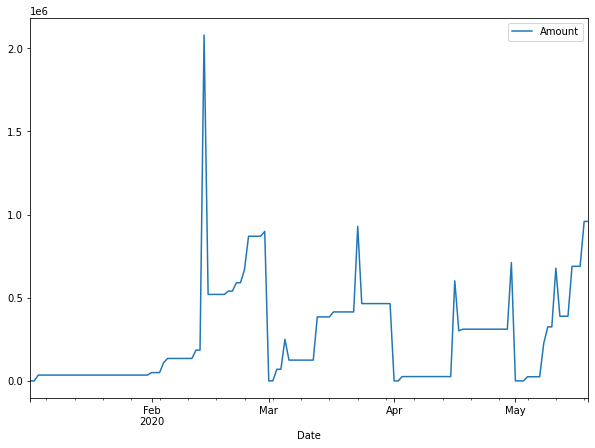

In [ ]:
#viz
data["Amount"].plot(figsize = (10, 7), legend = True)

#Training and Test Set

In [ ]:
#Training and test set
test_days = 30
training_set = data.iloc[:-test_days, :]
test_set = data.iloc[-test_days:, :]
test_set.tail(1)

,Amount
Date,
2020-05-19,959000.012


#TBATS Model

In [ ]:
#libraries
from tbats import TBATS

In [ ]:
#tbats model
model = TBATS(seasonal_periods = [12])
model = model.fit(training_set['Amount'])

In [ ]:
#predictions
predictions_tbats = pd.Series(model.forecast(steps = len(test_set))).rename("TBATS")
predictions_tbats.index = test_set.index
predictions_tbats.head()

Date
2020-04-20    311027.811113
2020-04-21    311027.811113
2020-04-22    311027.811113
2020-04-23    311027.811113
2020-04-24    311027.811113
Freq: D, Name: TBATS, dtype: float64

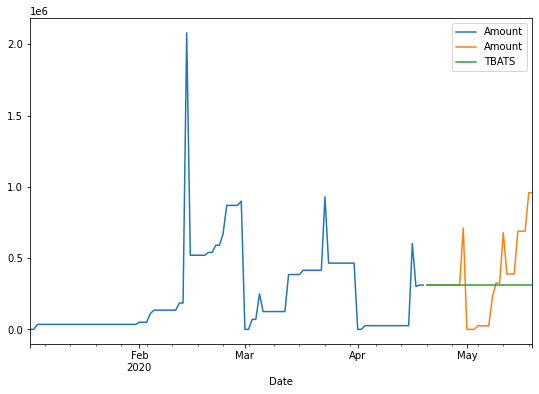

In [ ]:
#visualization
training_set['Amount'].plot(figsize = (9,6), legend = True)
test_set['Amount'].plot(legend = True)
predictions_tbats.plot(legend = True)

#Model assessment

In [ ]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['Amount'], predictions_tbats),0))
print(round(np.sqrt(mean_squared_error(test_set['Amount'], predictions_tbats)), 0))

187406.0
271199.0


In [ ]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['Amount'], predictions_tbats)

1900725672.1437037

#export forecasts

In [ ]:
predictions_tbats.to_csv('predictions_tbats.csv', index = True)